Leg:  [80.75, 80.75, 80.75, -16.194676214242634, 100.0]
Leg:  [39.0, 99.49791688126962, 99.58090015883835, 99.80697739664828, 100.00000000000003]
Leg:  [-40.0, -39.4979511707092, -49.49760685356368, -76.7403791573914, -100.0]
Leg:  [80.75, 80.75, 80.75, -16.194676214242634, 100.0]
Leg:  [-39.0, -99.49791688126962, -99.58090015883835, -99.80697739664828, -99.99999999999999]
Leg:  [-40.0, -39.49795117070923, -49.49760685356371, -76.74037915739146, -100.00000000000001]
Leg:  [-126.75, -126.75, -126.75, -218.20502498379562, -99.99999999999997]
Leg:  [39.0, 99.49791688126962, 99.58090015883835, 99.93065950467098, 99.99999999999999]
Leg:  [-40.0, -39.49795117070923, -49.49760685356371, -91.64432764668497, -100.00000000000003]
Leg:  [-126.75, -126.75, -126.75, -218.20502498379565, -100.0]
Leg:  [-39.0, -99.49791688126962, -99.58090015883835, -99.93065950467104, -100.00000000000003]
Leg:  [-40.0, -39.4979511707092, -49.49760685356368, -91.6443276466849, -100.0]


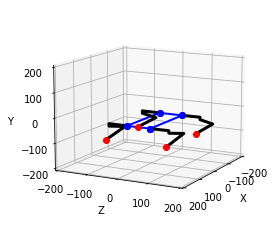

In [3]:
#https://gitlab.com/custom_robots/spotmicroai/simulation/-/blob/master/Basic%20simulation%20by%20user%20Florian%20Wilk/Kinematics/Kinematic.ipynb

from mpl_toolkits import mplot3d
import numpy as np
from math import *
import matplotlib.pyplot as plt


def setupView(limit):
    ax = plt.axes(projection="3d")
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.set_zlim(-limit, limit)
    ax.set_xlabel("X")
    ax.set_ylabel("Z")
    ax.set_zlabel("Y")
    return ax

setupView(200).view_init(elev=12., azim=28)

omega =  pi/4
phi =0
psi = 0

xm = 0
ym = 0
zm = 0

L = 207.5
W = 78
l1=60.5
l2=10
l3=100.7 #111.1  #100.7
l4=118.5


Lp=np.array([[100,-100,100,1],[100,-100,-100,1],[-100,-100,100,1],[-100,-100,-100,1]])

sHp=np.sin(pi/2)
cHp=np.cos(pi/2)

Lo=np.array([0,0,0,1])

def bodyIK(omega,phi,psi,xm,ym,zm):
    Rx = np.array([[1,0,0,0],
                   [0,np.cos(omega),-np.sin(omega),0],
                   [0,np.sin(omega),np.cos(omega),0],[0,0,0,1]])
    Ry = np.array([[np.cos(phi),0,np.sin(phi),0],
                   [0,1,0,0],
                   [-np.sin(phi),0,np.cos(phi),0],[0,0,0,1]])
    Rz = np.array([[np.cos(psi),-np.sin(psi),0,0],
                   [np.sin(psi),np.cos(psi),0,0],[0,0,1,0],[0,0,0,1]])
    Rxyz=Rx.dot(Ry).dot(Rz)

    T = np.array([[0,0,0,xm],[0,0,0,ym],[0,0,0,zm],[0,0,0,0]])
    Tm = T+Rxyz

    return([Tm.dot( np.array([[cHp,0,sHp,L/2],[0,1,0,0],[-sHp,0,cHp,W/2],[0,0,0,1]])),
           Tm.dot(np.array([[cHp,0,sHp,L/2],[0,1,0,0],[-sHp,0,cHp,-W/2],[0,0,0,1]])),
           Tm.dot(np.array([[cHp,0,sHp,-L/2],[0,1,0,0],[-sHp,0,cHp,W/2],[0,0,0,1]])),
           Tm.dot(np.array([[cHp,0,sHp,-L/2],[0,1,0,0],[-sHp,0,cHp,-W/2],[0,0,0,1]]))
           ])

def legIK(point):
    (x,y,z)=(point[0],point[1],point[2])
    F=sqrt(x**2+y**2-l1**2)
    G=F-l2  
    H=sqrt(G**2+z**2)
    theta1=-atan2(y,x)-atan2(F,-l1)
    
    D=(H**2-l3**2-l4**2)/(2*l3*l4)
    theta3=acos(D) 
    
    theta2=atan2(z,G)-atan2(l4*sin(theta3),l3+l4*cos(theta3))
    
    return(theta1,theta2,theta3)

def calcLegPoints(angles):
    (theta1,theta2,theta3)=angles
    theta23=theta2+theta3

    T0=Lo
    T1=T0+np.array([-l1*cos(theta1),l1*sin(theta1),0,0])
    T2=T1+np.array([-l2*sin(theta1),-l2*cos(theta1),0,0])
    T3=T2+np.array([-l3*sin(theta1)*cos(theta2),-l3*cos(theta1)*cos(theta2),l3*sin(theta2),0])
    T4=T3+np.array([-l4*sin(theta1)*cos(theta23),-l4*cos(theta1)*cos(theta23),l4*sin(theta23),0])
        
    return np.array([T0,T1,T2,T3,T4])

def drawLegPoints(p):
    # print("Leg: ", [x[0] for x in p],[x[2] for x in p],[x[1] for x in p])
    print("Leg: ", [x[0] for x in p])
    print("Leg: ", [x[2] for x in p])
    print("Leg: ", [x[1] for x in p])
    plt.plot([x[0] for x in p],[x[2] for x in p],[x[1] for x in p], 'k-', lw=3)
    plt.plot([p[0][0]],[p[0][2]],[p[0][1]],'bo',lw=2)
    plt.plot([p[4][0]],[p[4][2]],[p[4][1]],'ro',lw=2)    

def drawLegPair(Tl,Tr,Ll,Lr):
    Ix=np.array([[-1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
    drawLegPoints([Tl.dot(x) for x in calcLegPoints(legIK(np.linalg.inv(Tl).dot(Ll)))])
    drawLegPoints([Tr.dot(Ix).dot(x) for x in calcLegPoints(legIK(Ix.dot(np.linalg.inv(Tr)).dot(Lr)))])
    
def drawRobot(Lp,angles,center):
    (omega,phi,psi)=angles
    (xm,ym,zm)=center
    
    FP=[0,0,0,1]
    (Tlf,Trf,Tlb,Trb)= bodyIK(omega,phi,psi,xm,ym,zm)
    CP=[x.dot(FP) for x in [Tlf,Trf,Tlb,Trb]]

    CPs=[CP[x] for x in [0,1,3,2,0]]
    plt.plot([x[0] for x in CPs],[x[2] for x in CPs],[x[1] for x in CPs], 'bo-', lw=2)

    drawLegPair(Tlf,Trf,Lp[0],Lp[1])
    drawLegPair(Tlb,Trb,Lp[2],Lp[3])

# drawRobot(Lp,(0,0,0),(-40,-170,0)) # maarteen
# drawRobot(Lp,(0,0,0),(-40,-30,0)) # full sit
# drawRobot(Lp,(0,0,0),(0,130,0)) # long stand
drawRobot(Lp,(0,0,0),(-23,-40,0)) # sleep

# drawRobot(Lp,(0,0,0),(0,-50,-6)) # from h/w

plt.show()
